<a href="https://colab.research.google.com/github/chvrreddy/rainfall-prediction-project/blob/main/rain_fall_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports & path

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



Load dataset and quick inspection

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/austin_weather.csv')
df


,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,2017-07-27,103,89,75,71,67,61,82,54,25,...,29.97,29.88,10,10,10,12,5,21,0,
1315,2017-07-28,105,91,76,71,64,55,87,54,20,...,29.9,29.81,10,10,10,14,5,20,0,
1316,2017-07-29,107,92,77,72,64,55,82,51,19,...,29.86,29.79,10,10,10,12,4,17,0,
1317,2017-07-30,106,93,79,70,68,63,69,48,27,...,29.91,29.87,10,10,10,13,4,20,0,


In [ ]:
#drop the unnecessary columns
df = df.drop(['Events', 'Date','SeaLevelPressureLowInches'], axis=1)
df.head()

,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches
0,74,60,45,67,49,43,93,75,57,29.86,29.68,10,7,2,20,4,31,0.46
1,56,48,39,43,36,28,93,68,43,30.41,30.13,10,10,5,16,6,25,0
2,58,45,32,31,27,23,76,52,27,30.56,30.49,10,10,10,8,3,12,0
3,61,46,31,36,28,21,89,56,22,30.56,30.45,10,10,7,12,4,20,0
4,58,50,41,44,40,36,86,71,56,30.41,30.33,10,10,7,10,2,16,T


In [ ]:
df = df.replace('T', 0.0)
df = df.replace('-', 0.0)
df['PrecipitationSumInches'] = pd.to_numeric(df['PrecipitationSumInches'])
df.to_csv('austin_final.csv')

In [ ]:
x = df.drop(['PrecipitationSumInches'],axis = 1)
y = df['PrecipitationSumInches']

In [ ]:
#reshape it into a 2d vector
y = y.values.reshape(-1,1)


In [ ]:
day_index = 798
days = [i for i in range(y.size)]


In [ ]:
#intilize the linear regression classifier
clf = LinearRegression()
clf.fit(x,y)


LinearRegression()

The precipitation trend graph: 


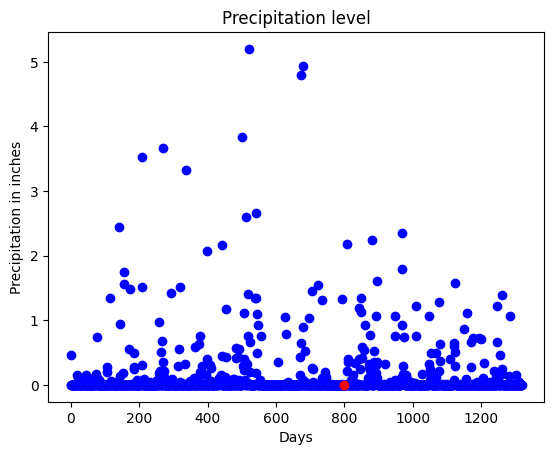

In [ ]:
#plot a graph
print('The precipitation trend graph: ')
plt.scatter(days,y,color='b')
plt.scatter(days[day_index],y[day_index],color='r')
plt.title('Precipitation level')
plt.xlabel('Days')
plt.ylabel('Precipitation in inches')
plt.show()
x_vis = x.filter(['TempAvgF','DewPointAvgF','HumidityAvgPercent','SeaLevelPressureAvgInches','VisibilityAvgMiles','WindAvgMPH'])

THe precipitation vs attributes trend graph : 


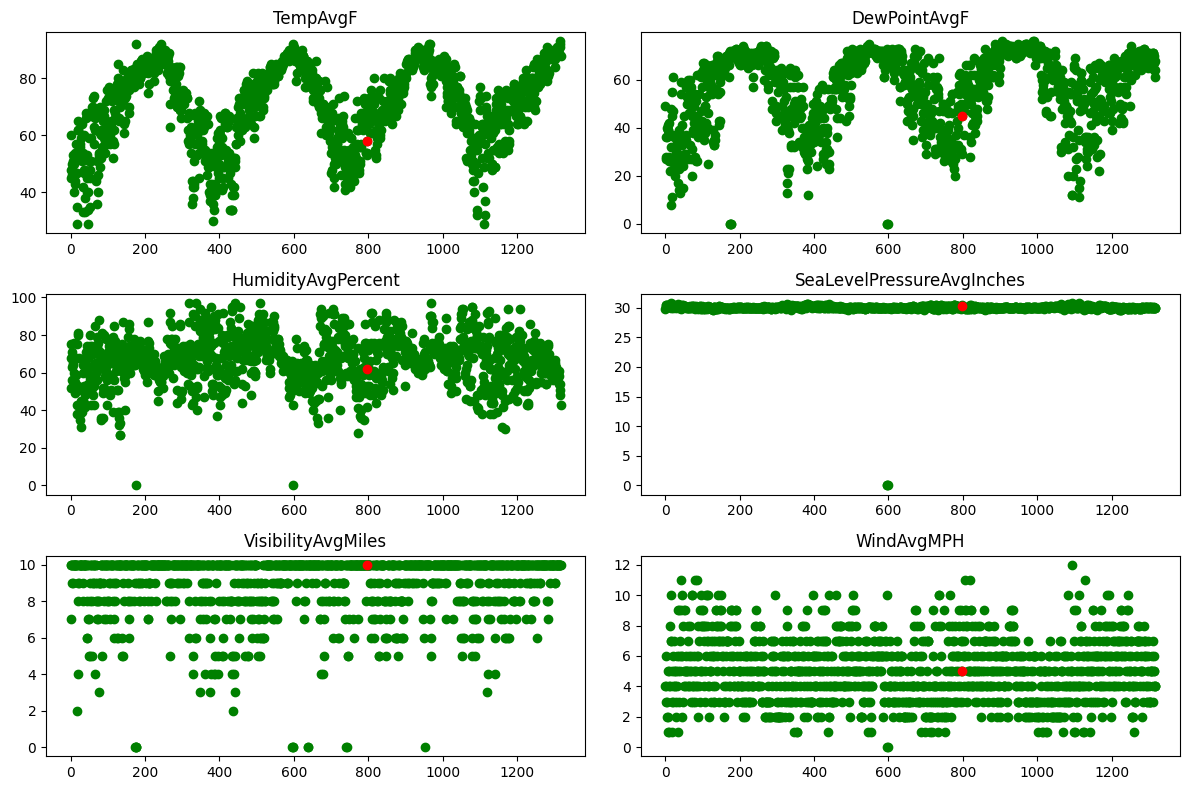

In [ ]:
print("THe precipitation vs attributes trend graph : ")

plt.figure(figsize=(12, 8))  # Add this line to set the figure size

for i in range(x_vis.columns.size):
  plt.subplot(3,2,i+1)
  # Explicitly convert the column to numeric
  y_data = pd.to_numeric(x_vis[x_vis.columns.values[i]], errors='coerce')
  plt.scatter(np.array(days), y_data, color='g')
  plt.scatter(np.array(days)[day_index], y_data.iloc[day_index], color='r')
  plt.title(x_vis.columns.values[i])

plt.tight_layout() # Add this line to prevent overlapping titles
plt.show()